### The Facebook Followers dataset has been used for exploratory analysis. This dataset is published on the data incubator blog for data analysis. This project tackles the below question using the checkins metric that represents the foot traffic for restaurant, hospitality and retail businesses:
#### Who are the top 5 companies who have the maximum checkins and belong to which categories? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
# !set low_memory=False

In [5]:
data = pd.read_csv("C:\\Users\\dwnt2427\\PythonNotebooks\\Data_Incubator_competition\\temp_datalab_records_social_facebook.csv") 

C:\Users\dwnt2427\AppData\Local\Continuum\anaconda3\envs\dlnd-tf-lab\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head(5)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [7]:
data.shape

(3621391, 14)

In [8]:
# check the username is not empty 
data = data[pd.notnull(data['username'])]

In [20]:
data.shape

(3500462, 14)

In [23]:
# data.dtypes

In [30]:
data['username'].value_counts() [:5]

ModelNInc     1222
RedRobin      1222
shutterfly    1222
2u            1222
SPG           1222
Name: username, dtype: int64

In [27]:
df = data[['username', 'checkins']] 

In [28]:
df.head()

,username,checkins
0,SodaStream,0
1,ANSYSInc,148
2,MyAquaAmerica,0
3,Qualcomm,173
4,eaglepharmaceuticals,0


In [31]:
df_grouped = df.groupby(['username'], as_index=False).agg({"checkins": "sum"})
df_grouped

,username,checkins
0,1011News,3914
1,1019thewolf,889125
2,1027WGUS,0
3,105.7WROR,29512
4,1079mixfm,430956
5,10best,0
6,1800flowers,0
7,1ShoppingCart,11808
8,1st.Sec.Bank,177165
9,1stDetect,0


In [32]:
df_grouped = df_grouped[df_grouped.checkins != 0]
df_grouped.shape

(3007, 2)

In [33]:
# sort in descending order
df_grouped = df_grouped.sort_values(by='checkins', ascending=False)
df_grouped

,username,checkins
788,Disneyland,7966491074
2904,WaltDisneyWorld,3057713075
1492,KnottsBerryFarm,2400647362
2428,SeaWorld,2346420768
2669,TheGarden,2139298637
789,DisneylandParisfr,2028963568
432,BuschGardensTampaBay,1817112592
3338,cedarpoint,1323897601
3595,empirestatebuilding,1304477805
4924,wynnlasvegas,959992611


In [34]:
# Top n in checkins
# df_grouped.nlargest(10, ['checkins']) 
top_winners = df_grouped['username'][:5].tolist()
print('top_winners ', top_winners)
checkins = df_grouped['checkins'][:5].tolist()
print('max checkins ', checkins)
df_cutoff_rows = df_grouped[:5]
# Amusement places

top_winners  ['Disneyland', 'WaltDisneyWorld', 'KnottsBerryFarm', 'SeaWorld', 'TheGarden']
max checkins  [7966491074, 3057713075, 2400647362, 2346420768, 2139298637]


In [35]:
df_cutoff_rows

,username,checkins
788,Disneyland,7966491074
2904,WaltDisneyWorld,3057713075
1492,KnottsBerryFarm,2400647362
2428,SeaWorld,2346420768
2669,TheGarden,2139298637


In [48]:
len(df_cutoff_rows['checkins'].tolist())

5

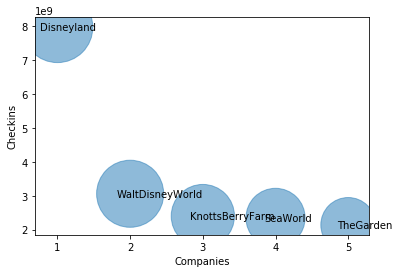

In [57]:
# plot diagram between the top 5 companies and checkins

import matplotlib.transforms as transforms

x = np.arange(start=1, stop=6, step=1)
y = df_cutoff_rows['checkins'].tolist()
z = np.arange(start=50, stop=1, step=-5)
    
f, ax = plt.subplots(1, 1)
ax.scatter(x, y, s=z*100, alpha=.5) 

for i, txt in enumerate(df_cutoff_rows.username):
    # it is approx the radius of the disc + 17 points to the left
    dx, dy = np.sqrt(i*10)/f.dpi - 17/f.dpi, 0.
    offset = transforms.ScaledTranslation(dx, dy, f.dpi_scale_trans)
    ax.text(x[i], y[i], s=txt, va='center',  ha='left', transform=ax.transData + offset)

ax.set_xlabel('Companies')
ax.set_ylabel('Checkins')

plt.show()

### Analysis of the bubbles/ scatter Diagram
#### The diagram showed that the winners are Disneyland, WaltDisneyWorld, KnottsBerryFarm, SeaWorld, and TheGarden and these companies/ users are placed under the same category of amusement places. 
#### The diagram also showed that Disneyland exceeds by an increase of 3.3% on average against the other companies and that the checkins for these companies have nearly close figures.